## What Is The Effect Of The Earth's Temperature on Cyclonic Storms?

Data Sources:

https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/atlanticMdr/land_ocean/tavg/60/0/1999-2024

https://berkeleyearth.org/temperature-region/north-america

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

## Plot 1: Where do hurricanes form and affect?

In [213]:
df_hur_us = pd.read_csv('https://raw.githubusercontent.com/stormwhale/data-mines/refs/heads/main/hurricane_us.csv')

#get the max category of hurricanes making landfall in the US from 1999 to 2024:
df_maxcat_idx = df_hur_us.groupby(['SID', 'SEASON', 'NAME'])['USA_SSHS'].idxmax()
df_maxcat_full = df_hur_us.iloc[df_maxcat_idx]
df_maxcat_full.rename(columns={'USA_SSHS': 'Hurricane_category'}, inplace=True)

#Create equator region:
lon_vals = np.linspace(-180, 180, 100)
lat_top = np.full_like(lon_vals, 10)
lat_bottom = np.full_like(lon_vals, -10)

df_equator = pd.DataFrame({
    'lon': np.concatenate([lon_vals, lon_vals[::-1]]),
    'lat': np.concatenate([lat_top, lat_bottom[::-1]])
})

#Geo map
fig = px.scatter_geo(
    df_maxcat_full,
    lat ='LAT',
    lon ='LON',
    hover_name ='NAME',
    color = 'Hurricane_category',
    size='USA_WIND',
    scope='world',
    width=1000,
    height=600,
    title='Hurricanes occur near the equator regions. Is it temperature related?',
    subtitle='Data from 1990-2024'
)

#Add the equator region shape:
fig.add_trace(
    px.scatter_geo(df_equator, lat='lat', lon='lon').data[0]
)
fig.data[-1].update(
    fill='toself', fillcolor='rgba(255,0,0,0.1)', line=dict(width=0),
    showlegend=False
)
fig.add_annotation(
    text="Equator",
    x=1, 
    y=0, 
    xref="x", 
    yref="y",  
    showarrow=False,
    font=dict(color="red", size=14)
)
fig.show()

C:\Users\godly\AppData\Local\Temp\ipykernel_12376\3689505782.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



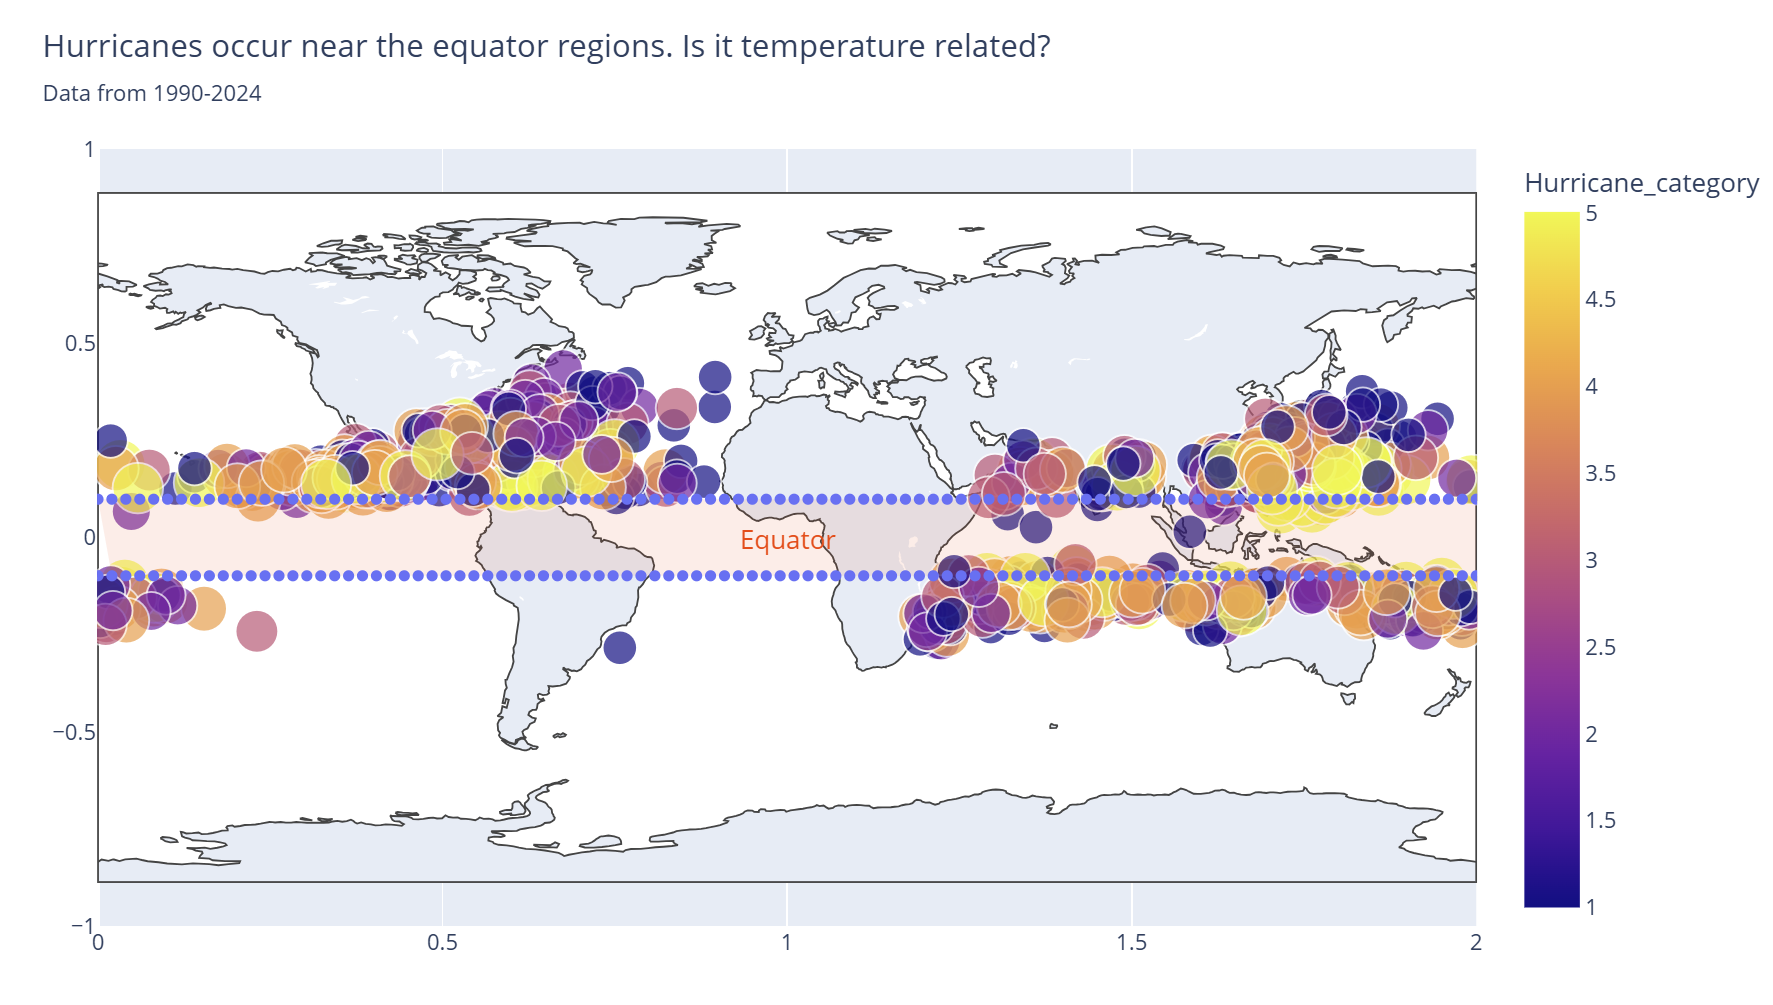

In [214]:
from IPython.display import Image
Image('newplot.png', width=1000, height=600)

## Plot 2: Average Ocean Temperatures
In land temperatures do not affect hurricanes since they draw energy from warm water over the ocean

C:\Users\godly\AppData\Local\Temp\ipykernel_12376\3616563816.py:15: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



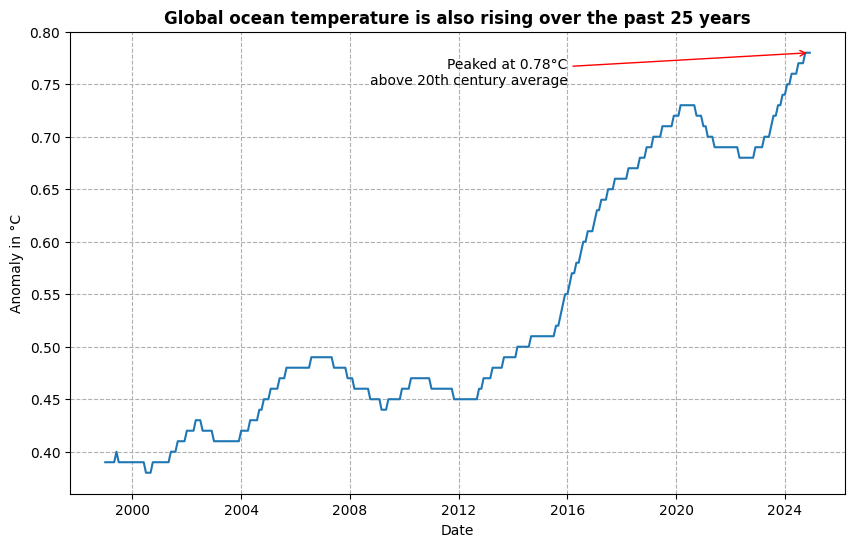

In [215]:
df_ocean = pd.read_csv('https://raw.githubusercontent.com/stormwhale/data-mines/refs/heads/main/ocean_temp.csv', skiprows=3)
df_ocean['Date'] = pd.to_datetime(df_ocean['Date'], format='%Y%m', errors='coerce')


#Plotting:
plt.figure(figsize=(10, 6))

sns.lineplot(
    df_ocean,
    x='Date',
    y='Anomaly'
)
plt.title('Global ocean temperature is also rising over the past 25 years', fontweight='bold')
plt.ylabel('Anomaly in °C')
plt.annotate(f'Peaked at {df_ocean['Anomaly'].max():.2f}°C\nabove 20th century average',
             xy=(df_ocean['Date'].iloc[df_ocean['Date'].idxmax()], df_ocean['Anomaly'].max()),
             xytext=(pd.Timestamp('2016-01-01'), 0.75),
             arrowprops=dict(facecolor='red',
                             arrowstyle='->',
                             color='red'), ha='right')
plt.grid(True, linestyle='--')



## Plot 3: Average anomaly, wind speed and hurricane category correlations

Text(0.5, 1.0, 'Temperature has no linear correlation with hurricane speed or intensity')

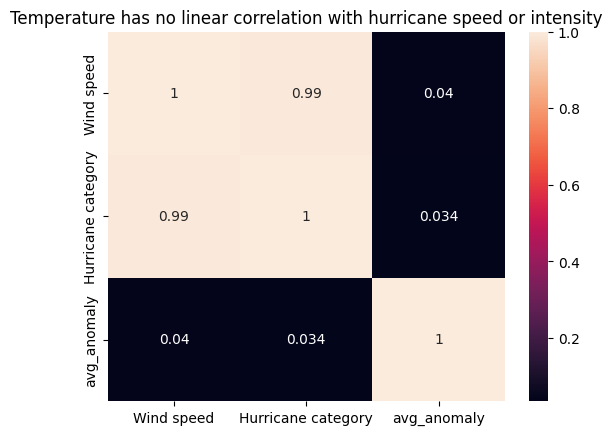

In [216]:
#Filter out only the maximum category of each hurricane making landfall in the US from 1999 to 2024:
idx_max2 = df_hur_us.groupby(['SID', 'SEASON', 'NAME'])['USA_SSHS'].idxmax()
df_only_max = df_hur_us.loc[idx_max2]
#Append the average temperature of the year to the hurricane dataframe:
df_ocean['Year'] = df_ocean['Date'].dt.year #Extract the year
avg_temp_year = df_ocean.groupby('Year')['Anomaly'].mean() #Get average temperature per year in the US
df_only_max['avg_anomaly'] = df_only_max['SEASON'].map(avg_temp_year)

#Generate correlation maps:
df_cor = df_only_max[['USA_WIND', 'USA_SSHS', 'avg_anomaly']]
df_cor.columns = ['Wind speed', 'Hurricane category', 'avg_anomaly']

sns.heatmap(df_cor.corr(), annot=True)
plt.title('Temperature has no linear correlation with hurricane speed or intensity')

## Plot 4: Number of occurences of hurricanes or storms over the past 25 years as temperatures rises

In [223]:

#get the max category of hurricanes making landfall in the US from 1999 to 2024:
df_maxcat = df_hur_us.groupby(['SID', 'SEASON', 'NAME'], as_index=False)['USA_SSHS'].max()
#Count the different categories of hurricanes per year:
df_hur_count = df_maxcat.groupby(['SEASON', 'USA_SSHS'], as_index=False).size()
df_hur_count.columns = ['Year', 'Hurricane Category', 'Count']
df_hur_count['Hurricane Category'] = df_hur_count['Hurricane Category'].astype(str)


fig = px.scatter(df_hur_count,
                 x='Year',
                 y='Count',
                 facet_col='Hurricane Category',
                 color='Hurricane Category',
                 trendline='ols',
                 title='Rising global sea level temperature has no effect on hurricane formation or intensity',
                 subtitle='Hurricane occurences are stable for the past 25 years')

fig.update_layout(width=1000,
                  height=600)

r_2 = [0.03, 0.05, 0.08, 0.003, 0.09]

for i, r in enumerate(r_2):
    fig.add_annotation(
        text=f'Category {i+1} R2 :{r}',
        xref='paper',
        yref='paper',
        x=1.17,  
        y= i*0.08,
        showarrow=False,
        font=dict(size=12, color='black'),
        align='left'
    )
    
fig.show()

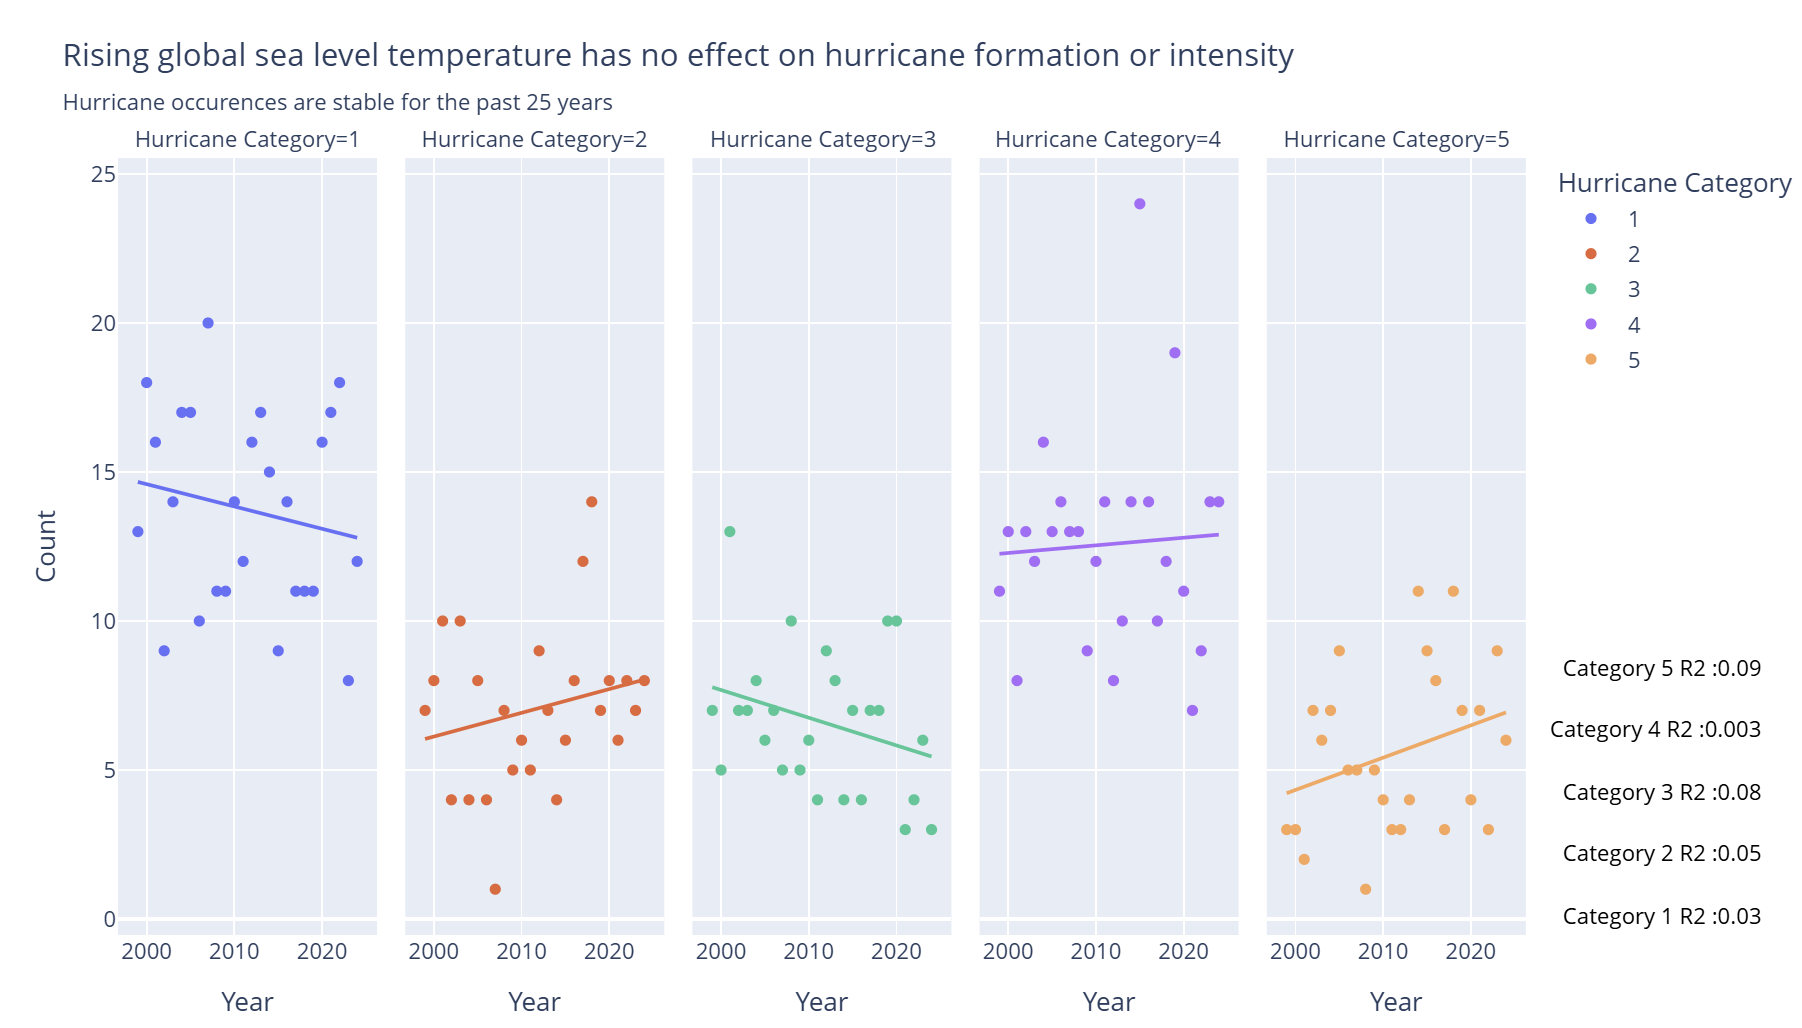

In [218]:
Image('2.png', width=1000, height=600)

summary:

Since hurricanes tend to form and become most intense along the earth equator, we hypothized that the global warming might affect hurricane occurences in the past 25 years. However, in this study, we observed that the number of storms and hurricanes did not vary significantly over the past 25 years despite the global sea level temperature showing a continous increase trend. The correlation finding also confirmed this observation that there was no linear relationship between average temperature increase to the effects of hurricane intensity and wind speed.